# 5장 차원 축소를 사용한 데이터 압축

## 주성분 분석을 통한 비지도 차원 축소

In [1]:
from IPython.display import Image
%matplotlib inline

### 주성분 분석의 주요 단계

주성분 분석은 특성 사이의 상관관계를 기반으로 하여 데이터에 있는 어떤 패턴을 찾을 수 있음

주성분 분석은 고차원 데이터에서 분산이 가장 큰 방향을 찾고 좀 더 작거나 같은 수의 차원을 갖는 새로운 부분 공간으로 이를 투영

새로운 부분 공간의 직교 좌표(주성분)는 주어진 조건하에서 분산이 최대인 방향으로 해석

In [2]:
'''
주성분 분석은 특성 사이의 상관관계를 기반으로 하여 데이터에 있는 어떤 패턴을 찾을 수 있음
주성분 분석은 고차원 데이터에서 분산이 가장 큰 방향을 찾고 좀 더 작거나 같은 수의 차원을 갖는 새로운 부분 공간으로 이를 투영
새로운 부분 공간의 직교 좌표(주성분)는 주어진 조건하에서 분산이 최대인 방향으로 해석
새로운 특성 축은 그림 같이 서로 직각을 이룸
'''
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch05/figures/05_01.png', width=400)

책에서 설명하는 차원 축소를 위한 PCA 알고리즘을 자세히 알아보기 전에 사용할 방법의 단계
1. d 차원 데이터셋을 표준화 전처리
2. 공분산 행렬(covariance matrix) 생성
3. 공분산 행렬을 고유 벡터(eigenvector)와 고윳값(eigenvalue)으로 분해
4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위 정함
5. 고윳값이 가장 큰 k개의 고유 벡터를 선택. 여기에서 k는 새로운 특성 부분 공간의 차원(k ≤ d).
6. 최상위 k개의 고유 벡터로 투영 행렬(projection matrix) W를 생성
7. 투영 행렬 W를 사용해서 d 차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환

### 주성분 추출 단계

In [3]:
'''
PCA 4단계를 처리
1. 데이터를 표준화 전처리
2. 공분산 행렬을 구성.
3. 공분산 행렬의 고윳값과 고유 벡터를 구함
4. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 정함
'''

# Wine 데이터셋 로드
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# UCI 머신 러닝 저장소에서 Wine 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# 훈련 데이터셋(70), 테스트 데이터셋(30) 비율 분할
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

In [5]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
'''
공분산 행렬의 고유 벡터가 주성분(최대분산의방향)을 표현
이에 대응되는 고윳값은 주성분의 크기
'''
# 공분산 행렬의 고윳값 분해
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\n고윳값 \n', eigen_vals)


고윳값 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


### 총분산과 설명된 분산

In [7]:
# 넘파이 cumsum 함수로 설명된 분산의 누적 합을 계산하고 맷플롯립의 step 함수로 그래프 표현
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

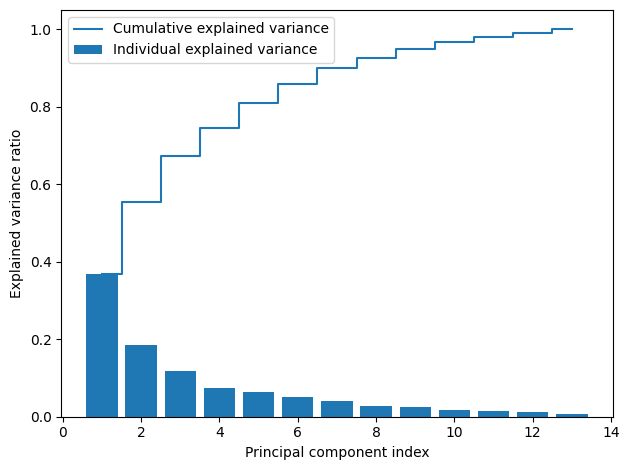

In [8]:
'''
처음 주성분은 40% 두번째 주성분은 20%
두개의 주성분으로 분산의 60%를 설명함
주성분 분석은 비지도 학습으로 클래스 레이블을 사용지 않음
분산은 특성 축을 따라 값들이 퍼진 정도를 측정
'''
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('figures/05_02.png', dpi=300)
plt.show()

### 특성 변환

In [9]:
'''
주성분 축으로 변환하는 단계
1. 고윳값이 가장큰 k개의 고유 벡터를 선택. k는 새로운 특성 부분 공간의 차원(k ≤ d)
2. 최상위 k개의 고유 벡터로 투영 행렬 W를 만듦
3. 투영 행렬 W를 사용해서 d 차원 입력 데이터셋 X를 새로운 k차원의 특성 부분 공간으로 변환
'''
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유벡터) 튜플을 정렬합니다
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [10]:
'''
가장 큰 두 개의 고윳값에 해당하는 고유 벡터를 선택
최상위 두 개의 고유 벡터로부터 13×2 차원의 투영 행렬 W를 만듦
'''
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W:\n', w)

투영 행렬 W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [11]:
# 두 개의 특성으로 구성된 2차원 샘플 벡터
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

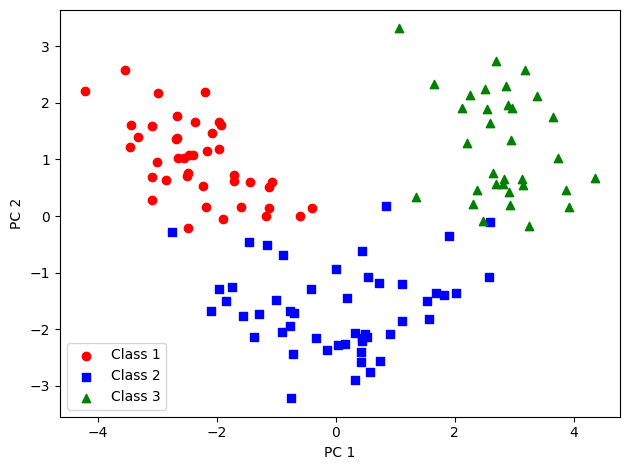

In [12]:
# 24×2 차원의 행렬로 변환된 Wine 훈련 데이터셋을 2차원 산점도로 시각화
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_03.png', dpi=300)
plt.show()

### 사이킷런의 주성분 분석

In [13]:
'''
사이킷런의 PCA 클래스를 Wine 데이터셋의 훈련 데이터셋에 적용하고, 로지스틱 회귀로 변환된 샘플 데이터를 분류
'''
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스별로 샘플을 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

In [14]:
# 두 개의 주성분 축으로 줄어든 훈련 데이터에서 만든 결정 경계 확인
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# PCA 변환기와 로지스틱 회귀 추정기를 초기화
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

# 차원 축소
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# 축소된 데이터셋으로 로지스틱 회귀 모델 훈련
lr = lr.fit(X_train_pca, y_train)

c:\Users\DK\anaconda3\envs\ml-pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


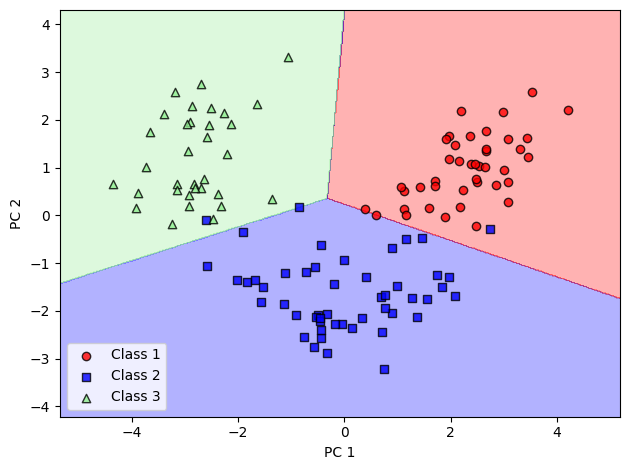

In [15]:
# 결정경계 그래프(PCA를 적용한 후 훈련 샘플과 로지스틱 회귀의 결정 경계)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_04.png', dpi=300)
plt.show()

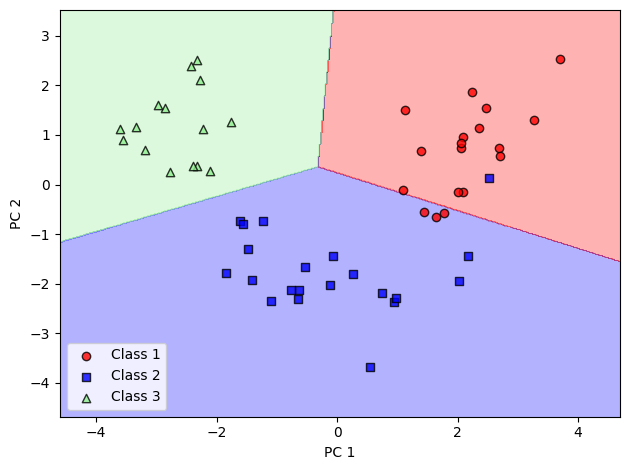

In [16]:
'''
사이킷런의 PCA 투영과 직접 만든 PCA 구현을 비교했을 때 두 그래프가 거울에 비친 것처럼 뒤집힌 경우가 있음
계산 방법에 따라 고유 벡터는 음수나 양수 부호를 가질 수 있음
데이터에 -1을 곱하여 이미지를 뒤집을 수 있음

아래는 테스트 데이터셋에서 결정경계를 그래프로 표현
'''
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_05.png', dpi=300)
plt.show()

In [17]:
#전체 주성분의 설명된 분산 비율 확인
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [18]:
'''
n_components에 (0, 1) 사이 실수를 입력하면 설명된 분산의 비율을 나타내며 자동으로 이 비율을 달성하기 위해 필요한 주성분 개수를 선택
'''
pca = PCA(n_components=0.95)
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 10
설명된 분산 비율: 0.9662714406558742


In [19]:
'''
n_components='mle'로 지정하면 토마스 민카(Thomas Minka)가 제안한 차원 선택 방식을 사용
'''
pca = PCA(n_components='mle')
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 9
설명된 분산 비율: 0.9499753029186232


In [20]:
'''
PCA의 가장 큰 제약 사항 중 하나는 배치로만 실행되기 때문에 대용량 데이터셋을 처리하려면 많은 메모리가 필요하다는 점
IncrementalPCA를 사용하면 데이터셋의 일부를 사용하여 반복적으로 훈련할 수 있음
'''
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=9)
for batch in range(len(X_train_std)//25+1):
    X_batch = X_train_std[batch*25:(batch+1)*25]
    ipca.partial_fit(X_batch)

print('주성분 개수:', ipca.n_components_)
print('설명된 분산 비율:', np.sum(ipca.explained_variance_ratio_))

주성분 개수: 9
설명된 분산 비율: 0.9478392700446653


### 특성 기여도 평가

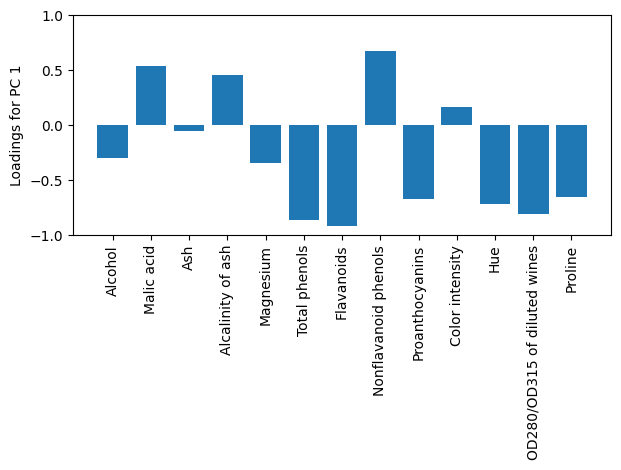

In [21]:
'''
원본 특성이 주성분에 얼마나 기여하는지를 흔히 로딩(loadings)이라 함
로딩은 고유 벡터에 고윳값의 제곱근을 곱해 계산할 수 있음
이 결과 값을 원래 특성과 주성분 간의 상관관계로 해석할 수 있음

아래는 직접 만든 PCA 구현으로 로딩을 계산
'''
# 고유 벡터에 고윳값의 제곱근을 곱해 13X13 차원 로딩 행렬을 계산
loadings = eigen_vecs * np.sqrt(eigen_vals)

# 첫 번째 주성분에 대한 로딩인 행렬의 첫 번째 열 loadings[:, 0]을 그래프로 표현
fig, ax = plt.subplots()

ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
# plt.savefig('figures/05_05_02.png', dpi=300)
plt.show()

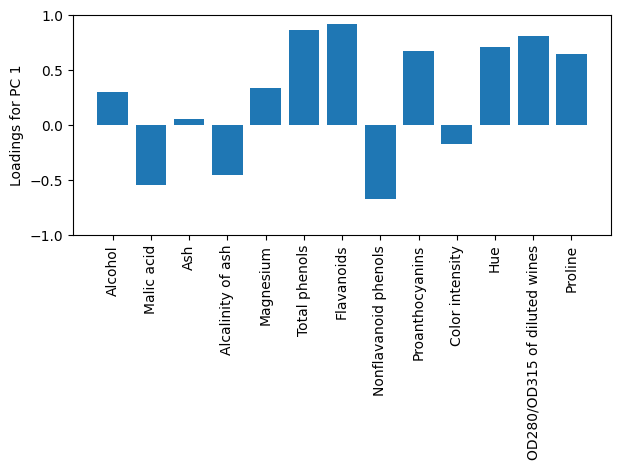

In [22]:
# 사이킷런의 PCA 객체에서 로딩 얻기
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()

ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
# plt.savefig('figures/05_05_03.png', dpi=300)
plt.show()

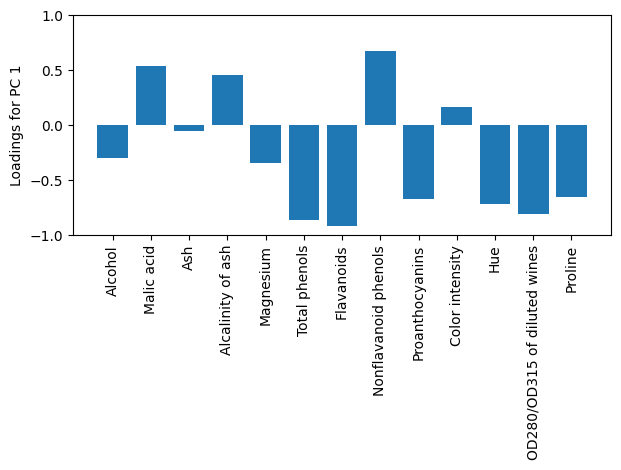

In [23]:
'''
위의 PCA 상관관계 그래프가 책과 깃허브 코드와 반대라서 데이터에 -1을 곱하여 같게 만들어줌
'''
sklearn_loadings2 = pca.components_.T * np.sqrt(pca.explained_variance_) * -1

fig2, ax2 = plt.subplots()

ax2.bar(range(13), sklearn_loadings2[:, 0], align='center')
ax2.set_ylabel('Loadings for PC 1')
ax2.set_xticks(range(13))
ax2.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
# plt.savefig('figures/05_05_03.png', dpi=300)
plt.show()

## 선형 판별 분석을 통한 지도 방식의 데이터 압축

선형 판별 분석(Linear Discriminant Analysis, LDA)은 규제가 없는 모델에서 차원의 저주로 인한 과대적합 정도를 줄이고 계산 효율성을 높이기 위한 특성 추출의 기법으로 사용할 수 있음

LDA 일반적인 개념은 PCA와 매우 비슷합니다. PCA가 데이터셋에 있는 분산이 최대인 직교 성분 축을 찾으려고 하는 반면, LDA 목표는 클래스를 최적으로 구분할 수 있는 특성 부분 공간을 찾는 것

LDA는 지도 학습 알고리즘

In [24]:
# 이진 분류 문제를 위한 LDA 개념을 요약하는 그래프
# 클래스 1의 샘플은 동그라미고 클래스 2의 샘플은 덧셈 기호
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch05/figures/05_06.png', width=400)

### 선형 판별 분석의 내부 동작 방식

LDA 수행에 필요한 주요 단계 요약
1. d 차원의 데이터셋을 표준화 전처리(d는 특성 개수)
2. 각 클래스에 대해 d 차원의 평균 벡터를 계산
3. 클래스 간의 산포 행렬(scatter matrix) SB와 클래스 내 산포 행렬 Sw를 구성
4. Sw-1SB 행렬의 고유 벡터와 고윳값을 계산
5. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순서를 정함
6. 고윳값이 가장 큰 k개의 고유 벡터를 선택하여 d×k 차원의 변환 행렬 W를 구성. 이 행렬의 열이 고유 벡터
7. 변환 행렬 W를 사용하여 샘플을 새로운 특성 부분 공간으로 투영

행렬을 고윳값과 고유 벡터로 분해하여 새로운 저차원 특성 공간을 구성한다는 점에서 PCA와 매우 닮음

### 산포 행렬 계산

In [25]:
'''
평균 벡터를 사용하여 클래스 간의 산포 행렬과 클래스 내 산포 행렬을 구성
'''
# 각 클래스에 대한 평균 벡터를 계산
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print(f'MV {label}: {mean_vecs[label - 1]}\n')

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [26]:
#클래스 내 산포 행렬을 계산
d = 13 # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # 각 클래스에 대한 산포 행렬
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # 열 벡터를 만듭니다
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          #클래스 산포 행렬을 더합니다

print('클래스 내의 산포 행렬: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

클래스 내의 산포 행렬: 13x13


In [27]:
'''
산포 행렬을 계산할 때 훈련 데이터셋의 클래스 레이블이 균등하게 분포되어 있다고 가정
예제의 클래스 레이블 갯수를 출력하면 해당 가정이 틀렸음을 확인 할 수 있음
'''

print('클래스 레이블 분포:',
      np.bincount(y_train)[1:])

클래스 레이블 분포: [41 50 33]


In [28]:
'''
공분산 행렬은 산포 행렬의 정규화 버전
'''
# 공분산 행렬 계산
d = 13  # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter

print('스케일 조정된 클래스 내의 산포 행렬: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

스케일 조정된 클래스 내의 산포 행렬: 13x13


In [29]:
# 클래스간 산포 행렬 계산
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # 열 벡터로 만들기

d = 13  # number of features
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # 열 벡터로 만들기
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('클래스 간의 산포 행렬: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

클래스 간의 산포 행렬: 13x13


### 새로운 특성 부분 공간을 위해 선형 판별 벡터 선택


LDA의 남은 단계는 PCA와 유사. 공분산 행렬에 대한 고윳값 분해를 수행하는 대신 행렬 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msubsup>
    <mi mathvariant="bold-italic">S</mi>
    <mi>W</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msubsup>
  <msub>
    <mi mathvariant="bold-italic">S</mi>
    <mi>B</mi>
  </msub>
</math> 의 고윳값을 계산


In [30]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [31]:
# 고윳값의 내림차순으로 고유 벡터를 정렬
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다.
# 0이 아닌 고윳값은 2개
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# (고윳값, 고유벡터) 튜플을 큰 값에서 작은 값 순서대로 정렬합니다.
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# 고윳값의 역순으로 올바르게 정렬되었는지 확인합니다.
print('내림차순의 고윳값:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

내림차순의 고윳값:

349.61780890599397
172.76152218979394
3.468545711267725e-14
2.842170943040401e-14
2.7442063449887868e-14
2.7442063449887868e-14
9.575021326720663e-15
9.575021326720663e-15
9.461437121374579e-15
8.932653014240921e-15
8.449943185761236e-15
2.9484922158293148e-15
1.2518544322246436e-15


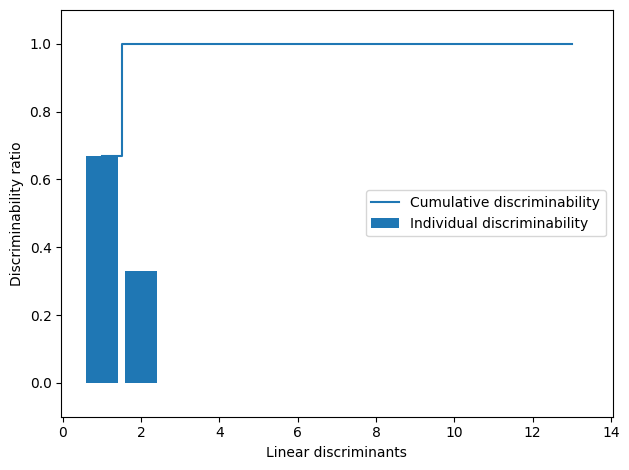

In [32]:
# PCA 절에서 만든 설명된 분산 그래프와 비슷하게 고윳값의 내림차순으로 선형 판별 벡터 생성
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, align='center',
        label='Individual discriminability')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative discriminability')
plt.ylabel('Discriminability ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/05_07.png', dpi=300)
plt.show()

In [33]:
# 두 개의 판별 고유 벡터를 열로 쌓아서 변환 행렬 W 생성
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('변환 행렬 W:\n', w)

변환 행렬 W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


### 새로운 특성 공간으로 샘플 투영

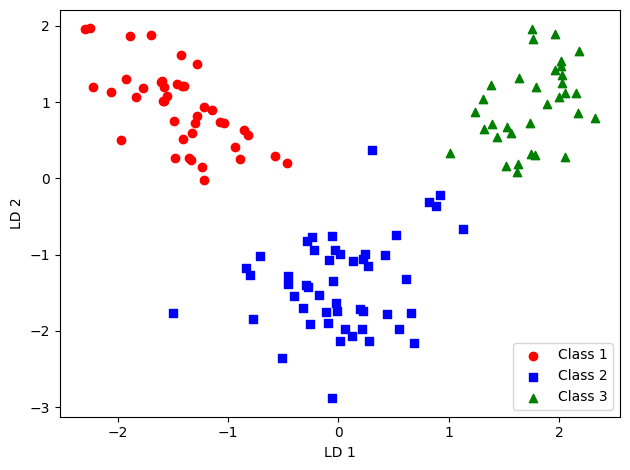

In [34]:
# 변환 행렬 W를 훈련 데이터셋에 곱해서 데이터를 변환
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('figures/05_08.png', dpi=300)
plt.show()

### 사이킷런의 LDA

In [35]:
# 사이킷런에 구현된 LDA 클래스
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

c:\Users\DK\anaconda3\envs\ml-pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


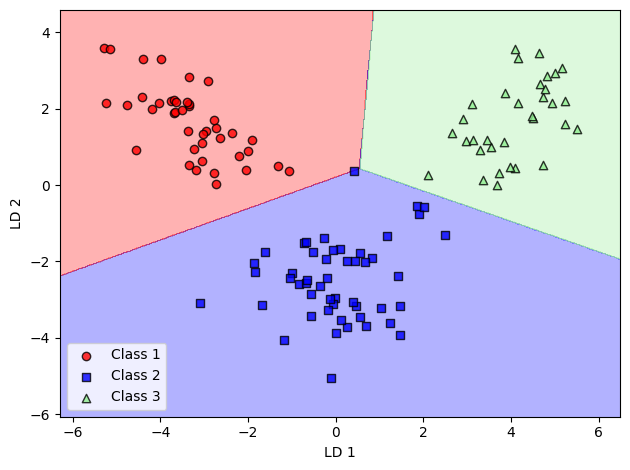

In [36]:
# LDA로 변환한 저차원 훈련 데이터셋에 로지스틱 회귀 분류기 동작 확인
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_09.png', dpi=300)
plt.show()

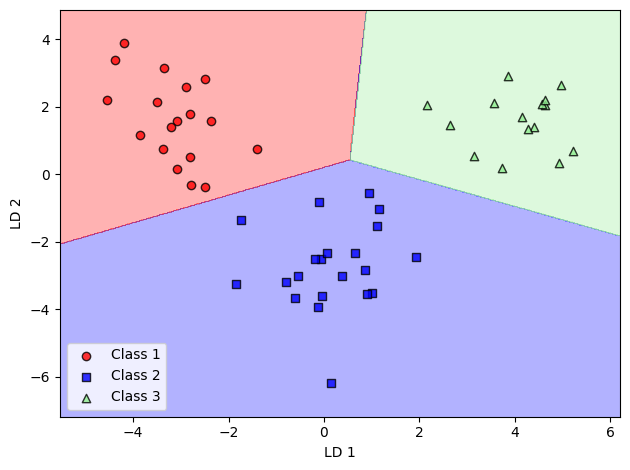

In [37]:
# 테스트 데이터로 확인
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_10.png', dpi=300)
plt.show()

In [38]:
'''
단계별로 설명한 LDA 구현은 LinearDiscriminantAnalysis 클래스의 solver 매개변수가 'eigen'일 때이며, 실제 사이킷런의 LDA 구현은 책과는 조금 다름
'''
# 클래스 비율 계산
y_uniq, y_count = np.unique(y_train, return_counts=True)
priors = y_count / X_train_std.shape[0]
priors

array([0.3306, 0.4032, 0.2661])

In [39]:
# 클래스 내 산포 행렬 계산
s_w = np.zeros((X_train_std.shape[1], X_train_std.shape[1]))
for i, label in enumerate(y_uniq):
    # 1/(n-1)이 아니라 1/n로 나눈 공분산 행렬을 얻기 위해 bias=True로 지정합니다.
    s_w += priors[i] * np.cov(X_train_std[y_train == label].T, bias=True)

In [40]:
# 클래스 간 산포 행렬에 클래스 비율을 곱해 계산
s_b = np.zeros((X_train_std.shape[1], X_train_std.shape[1]))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1].shape[0]
    mean_vec = mean_vec.reshape(-1, 1)
    s_b += priors[i] * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msubsup>
    <mi mathvariant="bold-italic">S</mi>
    <mi>W</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msubsup>
  <msub>
    <mi mathvariant="bold-italic">S</mi>
    <mi>B</mi>
  </msub>
</math>를 직접 구해 고윳값 분해를 하는 대신 scipy.linalg.eigh 함수에 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi mathvariant="bold-italic">S</mi>
    <mi>B</mi>
  </msub>
</math> 와 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi mathvariant="bold-italic">S</mi>
    <mi>W</mi>
  </msub>
</math>를 전달하면 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi mathvariant="bold-italic">S</mi>
    <mi>B</mi>
  </msub>
</math>w = λ<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi mathvariant="bold-italic">S</mi>
    <mi>W</mi>
  </msub>
</math>w 식의 고윳값을 바로 계산할 수 있음

계산 후에 고윳값 크기의 역순으로 고유 벡터를 정렬하여 최종 고유 벡터를 구함

In [41]:
import scipy
ei_val, ei_vec = scipy.linalg.eigh(s_b, s_w)
ei_vec = ei_vec[:, np.argsort(ei_val)[::-1]]

In [42]:
'''여기서 계산한 것과 LinearDiscriminantAnalysis 클래스의 결과와 같은지 확인'''
lda_eigen = LDA(solver='eigen')
lda_eigen.fit(X_train_std, y_train)

LinearDiscriminantAnalysis(solver='eigen')

In [43]:
# 클래스 내의 산포 행렬은 covariance_ 속성에 저장
np.allclose(s_w, lda_eigen.covariance_)

True

In [44]:
# 클래스 간 산포 행렬은 따로 제공되지 않지만 총 산포 행렬에서 클래스 내 산포 행렬을 빼서 구할 수 있음
Sb = np.cov(X_train_std.T, bias=True) - lda_eigen.covariance_
np.allclose(Sb, s_b)

True

In [45]:
# 고유 벡터는 scalings_ 속성에 저장되어 있음
# 두개의 고유 벡터를 비교
np.allclose(lda_eigen.scalings_[:, :2], ei_vec[:, :2])

True

In [46]:
# transform 메서드는 단순히 샘플과 고유 벡터의 점곱으로 구현
np.allclose(lda_eigen.transform(X_test_std), np.dot(X_test_std, ei_vec[:, :2]))

True

## 비선형의 차원 축소와 시각화

### 비선형 차원 축소를 고려하는 이유

실제 애플리케이션에서 비선형 문제를 다루어야 할 때, PCA와 LDA 같은 차원 축소를 위한 선형 변환 기법은 최선의 선택이 아님

In [47]:
# 선형 문제와 비선형 문제의 차이점
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch05/figures/05_11.png', width=500)

### t-SNE를 사용한 데이터 시각화

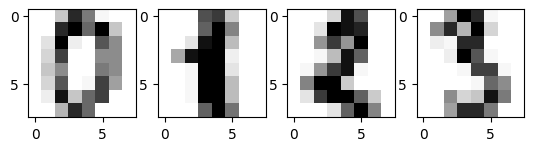

In [48]:
'''
t-SNE는 고차원(원본) 특성 공간에서 샘플 쌍의 거리를 기반으로 데이터 포인트를 모델링
그 다음 새로운 저차원 공간에서 원본 공간에 있는 쌍 거리의 확률 분포에 가까운 쌍 거리의 확률 분포를 찾음
즉, t-SNE는 원본 공간의 쌍 거리가 유지되도록 데이터 포인트를 저차원 공간에 임베딩하는 방법을 학습
다음 코드는 64차원 데이터셋에 t-SNE를 적용하는 간단한 데모
'''
# 저해상도 손 글씨 숫자(숫자 0~9) 데이터셋을 사이킷런으로부터 로드
from sklearn.datasets import load_digits

digits = load_digits()

# 총 1,797개의 이미지로 구성된 데이터셋에서 처음 네 개의 이미지를 출력
fig, ax = plt.subplots(1, 4)

for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')

# plt.savefig('figures/05_12.png', dpi=300)
plt.show()

In [49]:
# 샘플이 행, 픽셀이 열에 해당하는 표 형식으로 데이터 제공
digits.data.shape

(1797, 64)

In [50]:
# 특성(픽셀)을 새 변수 X_digits에 할당하고 레이블을 또 다른 새 변수 y_digits에 할당
y_digits = digits.target
X_digits = digits.data

In [51]:
# 사이킷런에서 t-SNE 클래스를 가져와서 새로운 tsne 객체를 훈련
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2,
            init='pca',
            random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

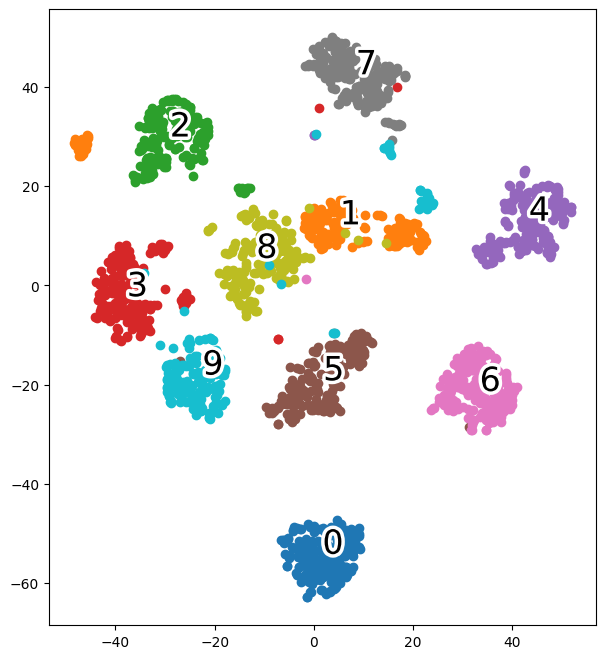

In [52]:
# 2D t-SNE 임베딩을 시각화
import matplotlib.patheffects as PathEffects


def plot_projection(x, colors):

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])

    for i in range(10):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])

plot_projection(X_digits_tsne, y_digits)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()

차원 축소 기법 학습 (PCA, LDA)

PCA는 클래스 레이블을 시용하지 않고 직교하는 특성 축을 따라 분산이 최대가 되는 저차원 부분 공간으로 데이터를 투영

LDA는 지도 학습 방법의 차원 축소 기법. 훈련 데이터셋에 있는 클래스 정보를 사용하여 선형 특성 공간에서 클래스 구분 능력을 최대화

2차원 또는 3차원으로 데이터를 시각화하는 데 사용하는 비선형 특성 추출 기법인 t-SNE